In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

C:\Users\ngaco\AppData\Local\Temp\ipykernel_16568\753233649.py:82: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point1.set_data(RX[-1], RY[-1])


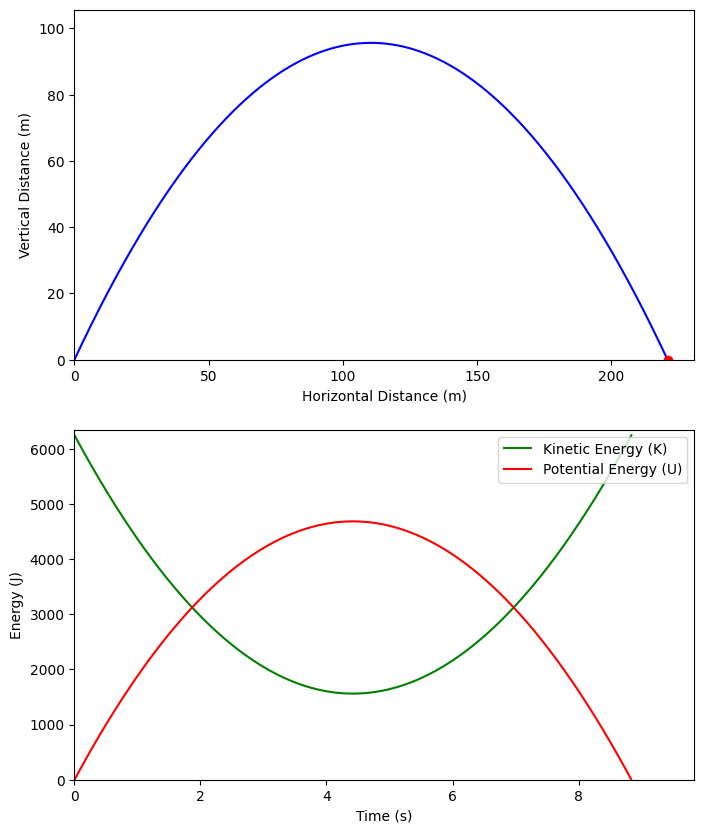

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [4]:
m = 5.0
g = 9.8
theta = np.pi/3
rx, ry = 0.0, 0.0
vx, vy = 50.0*np.cos(theta), 50.0*np.sin(theta)
ax, ay = 0.0, -g
k = 0.5*m*(vx**2 + vy**2)
u = m*g*ry 
t, dt = 0.0, 0.001

RX, VX = [rx], [vx]
RY, VY = [ry], [vy]
U, K = [u], [k]
T = [t]

i = 0
while i == 0 or ry >= 0:

    # velocity update:
    vx = ax*t + VX[0]
    vy = ay*t + VY[0]
    VX.append(vx)
    VY.append(vy)

    # position update:
    rx = 0.5*ax*t**2 + VX[0]*t
    ry = 0.5*ay*t**2 + VY[0]*t
    RX.append(rx)
    RY.append(ry)

    # energy update:
    k = 0.5*m*(vx**2 + vy**2)
    u = m*g*ry
    K.append(k)
    U.append(u)

    t += dt
    T.append(t)
    
    i += 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# For the projectile path
ax1.set_xlim(0, max(RX) + 10)
ax1.set_ylim(0, max(RY) + 10)
ax1.set_xlabel("Horizontal Distance (m)")
ax1.set_ylabel("Vertical Distance (m)")
line1, = ax1.plot([], [], 'b-')
point1, = ax1.plot([], [], 'ro')

# For the energy plots
ax2.set_xlim(0, max(T) + 1)
ax2.set_ylim(0, max(max(K), max(U)) + 100)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Energy (J)")
line2, = ax2.plot([], [], 'g-', label='Kinetic Energy (K)')
line3, = ax2.plot([], [], 'r-', label='Potential Energy (U)')
ax2.legend(loc='upper right')

def init():
    line1.set_data([], [])
    point1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, point1, line2, line3

def update(frame):
    # Update trajectory plot
    line1.set_data(RX[:frame], RY[:frame])
    point1.set_data([RX[frame]], [RY[frame]])  # Modified this line

    # Update energy plots
    line2.set_data(T[:frame], K[:frame])
    line3.set_data(T[:frame], U[:frame])
    return line1, point1, line2, line3

ani = FuncAnimation(fig, update, frames=len(RX), init_func=init, blit=True, interval=1)

# Set the data for the final state
line1.set_data(RX, RY)
point1.set_data(RX[-1], RY[-1])
line2.set_data(T, K)
line3.set_data(T, U)

plt.savefig('final_plot.png', dpi=300)
plt.show()
HTML(ani.to_html5_video())